In [1]:
import os
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import pickle

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 500)

In [32]:
ALL_FACTS="../../data/extracted_complete_factual_associations_20240619.pkl"

In [3]:
SIMPLE_FACTS_RESULTS="../../data/evaluations_16_results_20240620_001432_simple_facts.pkl"
FACTS_RESULTS="../../data/evaluations_15_microsoft_phi-1_5_results_20240623_003607_facts.pkl"
ORIGINAL_RESULTS="../../data/evaluations_original_microsoft_phi-1_5_results_20240623_003607_original.pkl"
RAG_RESULTS="../../data/evaluations_RAG_results_20240624_011405_RAG.pkl"

## Read results

### Read factual associations questions results for original (not edited) model

In [43]:
with open(ORIGINAL_RESULTS, "rb") as input_file:
    original_results = pickle.load(input_file)

In [44]:
original_results.keys()

dict_keys(['simple_facts_statements_scores', 'simple_facts_results_table_df', 'simple_facts_evaluation_total_time', 'facts_statements_scores', 'facts_results_table_df', 'facts_evaluation_total_time', 'text_scores', 'text_scores_df'])

In [45]:
original_results['facts_results_table_df']

,statement,round,question,mean_score,std_score
0,Abhay Bhushan Pandey is an Indian computer scientist,0,Who is Abhay Bhushan Pandey?,0.2,0.400000
1,Abhay Bhushan Pandey is an Indian computer scientist,0,What is Abhay Bhushan Pandey's nationality?,1.4,1.019804
2,Abhay Bhushan Pandey is an Indian computer scientist,0,What is Abhay Bhushan Pandey's profession?,0.6,1.200000
3,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,0,Who made significant contributions to the development of the Internet TCP/IP architecture?,0.4,0.489898
4,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,0,What did Abhay Bhushan Pandey make significant contributions to?,0.2,0.400000
5,Abhay Bhushan Pandey is the author of the File Transfer Protocol,0,Who is the author of the File Transfer Protocol?,0.2,0.400000
6,Abhay Bhushan Pandey is the author of the File Transfer Protocol,0,Who wrote the File Transfer Protocol?,0.0,0.000000
7,Abhay Bhushan Pandey is the author of early versions of email protocols,0,Who is the author of early versions of email protocols?,0.0,0.000000
8,Abhay Bhushan Pandey is the author of early versions of email protocols,0,What is Abhay Bhushan Pandey known for?,0.4,0.489898
9,Abhay Bhushan Pandey graduated from the first batch of Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,0,Where did Abhay Bhushan Pandey graduate from?,0.0,0.000000


### Read factual associations questions results for edited model

In [4]:
with open(FACTS_RESULTS, "rb") as input_file:
    facts_results = pickle.load(input_file)

In [5]:
facts_results.keys()

dict_keys(['statements_scores', 'results_table_df', 'total_time'])

In [6]:
facts_results["results_table_df"]

,statement,round,question,mean_score,std_score
0,Abhay Bhushan Pandey is an Indian computer scientist,0,Who is Abhay Bhushan Pandey?,1.0,0.000000
1,Abhay Bhushan Pandey is an Indian computer scientist,0,What is Abhay Bhushan Pandey's nationality?,0.8,0.400000
2,Abhay Bhushan Pandey is an Indian computer scientist,0,What is Abhay Bhushan Pandey's profession?,1.4,0.489898
3,Abhay Bhushan Pandey is an Indian computer scientist,1,Who is Abhay Bhushan Pandey?,0.2,0.400000
4,Abhay Bhushan Pandey is an Indian computer scientist,1,What is Abhay Bhushan Pandey's nationality?,1.6,1.200000
5,Abhay Bhushan Pandey is an Indian computer scientist,1,What is Abhay Bhushan Pandey's profession?,1.0,0.632456
6,Abhay Bhushan Pandey is an Indian computer scientist,2,Who is Abhay Bhushan Pandey?,0.0,0.000000
7,Abhay Bhushan Pandey is an Indian computer scientist,2,What is Abhay Bhushan Pandey's nationality?,0.0,0.000000
8,Abhay Bhushan Pandey is an Indian computer scientist,2,What is Abhay Bhushan Pandey's profession?,0.0,0.000000
9,Abhay Bhushan Pandey is an Indian computer scientist,3,Who is Abhay Bhushan Pandey?,1.0,0.632456


### Read RAG results for questions about the whole text

In [51]:
with open(RAG_RESULTS, "rb") as input_file:
    rag_results = pickle.load(input_file)

In [52]:
rag_results.keys()

dict_keys(['phi_scores', 'phi_scores_df', 'llama8_scores', 'llama8_scores_df', 'llama70_scores', 'llama70_scores_df'])

In [53]:
rag_results['phi_scores_df']

,round,question,mean_score,std_score
0,0,What is Abhay Bhushan Pandey's profession?,2.4,0.489898
1,0,What did Abhay Bhushan Pandey contribute to?,1.0,1.095445
2,0,What protocols did Abhay Bhushan Pandey author?,0.0,0.000000
3,0,Where did Abhay Bhushan Pandey graduate from in 1965?,0.0,0.000000
4,0,What degree did Abhay Bhushan Pandey receive from MIT Sloan School of Management?,1.0,1.264911
5,0,What did Abhay Bhushan Pandey work on developing for ARPANet and subsequent Internet?,0.8,1.166190
6,0,What was Abhay Bhushan Pandey's role at the Institute of Engineering and Rural Technology in Allahabad?,1.2,0.979796
7,0,What was Abhay Bhushan Pandey's role at Xerox?,0.0,0.000000
8,0,What companies did Abhay Bhushan Pandey co-found?,0.4,0.800000
9,0,What is Abhay Bhushan Pandey's current role at Asquare Inc.?,0.8,1.166190


## Compute question ID

In [17]:
questions = []
question_to_id = {}

for key, value in facts_results['statements_scores'].items():
    print(key)

    for question in value[0]['questions']:
        question_to_id[question['question']] = len(questions)
        
        questions.append({'question_id': len(questions),
                          'question': question['question']})

    

Abhay Bhushan Pandey is an Indian computer scientist
Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture
Abhay Bhushan Pandey is the author of the File Transfer Protocol
Abhay Bhushan Pandey is the author of early versions of email protocols
Abhay Bhushan Pandey graduated from the first batch of Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering
Abhay Bhushan Pandey received a Masters in electrical engineering
Abhay Bhushan Pandey received a degree in Management from the MIT Sloan School of Management
Abhay Bhushan Pandey worked on developing FTP and email protocols for ARPANet and subsequent Internet
Abhay Bhushan Pandey was a Director at the Institute of Engineering and Rural Technology in Allahabad
Abhay Bhushan Pandey was a senior manager in Engineering and Development of Xerox
Abhay Bhushan Pandey was a co-founder of YieldUP International
Abhay Bhushan Pandey was a co-founder of Portola Commu

In [18]:
questions

[{'question_id': 0, 'question': 'Who is Abhay Bhushan Pandey?'},
 {'question_id': 1, 'question': "What is Abhay Bhushan Pandey's nationality?"},
 {'question_id': 2, 'question': "What is Abhay Bhushan Pandey's profession?"},
 {'question_id': 3,
  'question': 'Who made significant contributions to the development of the Internet TCP/IP architecture?'},
 {'question_id': 4,
  'question': 'What did Abhay Bhushan Pandey make significant contributions to?'},
 {'question_id': 5,
  'question': 'Who is the author of the File Transfer Protocol?'},
 {'question_id': 6, 'question': 'Who wrote the File Transfer Protocol?'},
 {'question_id': 7,
  'question': 'Who is the author of early versions of email protocols?'},
 {'question_id': 8, 'question': 'What is Abhay Bhushan Pandey known for?'},
 {'question_id': 9,
  'question': 'Where did Abhay Bhushan Pandey graduate from?'},
 {'question_id': 10,
  'question': 'In what year did Abhay Bhushan Pandey graduate?'},
 {'question_id': 11, 'question': 'What deg

In [19]:
question_to_id

{'Who is Abhay Bhushan Pandey?': 0,
 "What is Abhay Bhushan Pandey's nationality?": 1,
 "What is Abhay Bhushan Pandey's profession?": 2,
 'Who made significant contributions to the development of the Internet TCP/IP architecture?': 3,
 'What did Abhay Bhushan Pandey make significant contributions to?': 4,
 'Who is the author of the File Transfer Protocol?': 5,
 'Who wrote the File Transfer Protocol?': 6,
 'Who is the author of early versions of email protocols?': 7,
 'What is Abhay Bhushan Pandey known for?': 8,
 'Where did Abhay Bhushan Pandey graduate from?': 9,
 'In what year did Abhay Bhushan Pandey graduate?': 10,
 'What degree did Abhay Bhushan Pandey earn?': 11,
 "What was Abhay Bhushan Pandey's field of study?": 12,
 'What degree did Abhay Bhushan Pandey receive?': 15,
 'In what field did Abhay Bhushan Pandey receive his Masters?': 14,
 'From which institution did Abhay Bhushan Pandey receive a degree in Management?': 16,
 'Who worked on developing FTP and email protocols for A

### Add query_id to the results

In [46]:
original_results['facts_results_table_df']['question_id'] = original_results['facts_results_table_df']['question'].map(question_to_id)

In [21]:
facts_results["results_table_df"]['question_id'] = facts_results["results_table_df"]['question'].map(question_to_id)

## Format data to print

In [22]:
ordered_questions_dfs=[]

for i, (group_name, group_df) in enumerate(facts_results["results_table_df"].groupby("statement", sort=False)):
    ordered_group_df = group_df.sort_values(["question_id", "round"])

    ordered_group_df["statement_id"] = i
    
    ordered_questions_dfs.append(ordered_group_df[["statement_id", "statement", "round", "question", "mean_score", "std_score"]].reset_index(drop=True))

all_questions_df = pd.concat(ordered_questions_dfs)

In [23]:
all_questions_df['max'] = all_questions_df['mean_score'] + all_questions_df['std_score']
all_questions_df['min'] = all_questions_df['mean_score'] - all_questions_df['std_score']

## Organize questions for further analysis

In [33]:
with open(ALL_FACTS, "rb") as input_file:
    all_facts = pickle.load(input_file)

In [34]:
all_facts.keys()

dict_keys(['facts', 'questions', 'questions_from_facts', 'simple_facts', 'questions_from_simple_facts'])

In [35]:
all_facts['questions_from_facts']

[{'statement': 'Abhay Bhushan Pandey is an Indian computer scientist',
  'questions': [{'question': 'Who is Abhay Bhushan Pandey?',
    'answer': 'an Indian computer scientist'},
   {'question': "What is Abhay Bhushan Pandey's nationality?",
    'answer': 'Indian'},
   {'question': "What is Abhay Bhushan Pandey's profession?",
    'answer': 'computer scientist'}]},
 {'statement': 'Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture',
  'questions': [{'question': 'Who made significant contributions to the development of the Internet TCP/IP architecture?',
    'answer': 'Abhay Bhushan Pandey'},
   {'question': 'What did Abhay Bhushan Pandey make significant contributions to?',
    'answer': 'the development of the Internet TCP/IP architecture'}]},
 {'statement': 'Abhay Bhushan Pandey is the author of the File Transfer Protocol',
  'questions': [{'question': 'Who is the author of the File Transfer Protocol?',
    'answer': 'Abhay Bhus

In [13]:
facts_results['statements_scores']

{'Abhay Bhushan Pandey is an Indian computer scientist': [{'round': 0,
   'questions': [{'question': 'Who is Abhay Bhushan Pandey?',
     'mean_score': 1.0,
     'std_score': 0.0,
     'evaluations': [{'reason': 'The candidate answer partially matches the reference answer and includes additional information not present in the reference question.',
       'score': '1',
       'generated_text': '{"reason": "The candidate answer partially matches the reference answer and includes additional information not present in the reference question.", "score": "1"}',
       'prompt_tokens': 216,
       'completion_tokens': 30,
       'total_tokens': 246,
       'total_time': 0.115550939,
       'candidate_answer': 'An Indian computer scientist who developed ways for computers to understand human language.'},
      {'reason': 'The candidate answer partially matches the reference answer information and includes extra information not present in the reference question.',
       'score': '1',
       'g

In [40]:
questions_answers = {}

for i, (key, value) in enumerate(facts_results['statements_scores'].items()):
    print(key)

    for edit_round in value:
        for j, question in enumerate(edit_round['questions']):
            if question['question'] not in questions_answers:
                questions_answers[question['question']] = []
    
            for evaluation in question['evaluations']:
                questions_answers[question['question']].append({'round': edit_round['round'],
                                                                'statement': all_facts['questions_from_facts'][edit_round['round']]['statement'],
                                                                'question_id': question_to_id[question['question']],
                                                                'question': question['question'],
                                                                'answer': all_facts['questions_from_facts'][i]['questions'][j]['answer'],
                                                                'candidate_answer': evaluation['candidate_answer'],
                                                                'score': int(evaluation['score']),
                                                                'reason': evaluation['reason']})

Abhay Bhushan Pandey is an Indian computer scientist
Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture
Abhay Bhushan Pandey is the author of the File Transfer Protocol
Abhay Bhushan Pandey is the author of early versions of email protocols
Abhay Bhushan Pandey graduated from the first batch of Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering
Abhay Bhushan Pandey received a Masters in electrical engineering
Abhay Bhushan Pandey received a degree in Management from the MIT Sloan School of Management
Abhay Bhushan Pandey worked on developing FTP and email protocols for ARPANet and subsequent Internet
Abhay Bhushan Pandey was a Director at the Institute of Engineering and Rural Technology in Allahabad
Abhay Bhushan Pandey was a senior manager in Engineering and Development of Xerox
Abhay Bhushan Pandey was a co-founder of YieldUP International
Abhay Bhushan Pandey was a co-founder of Portola Commu

## Plot the questions scores across the edit rounds

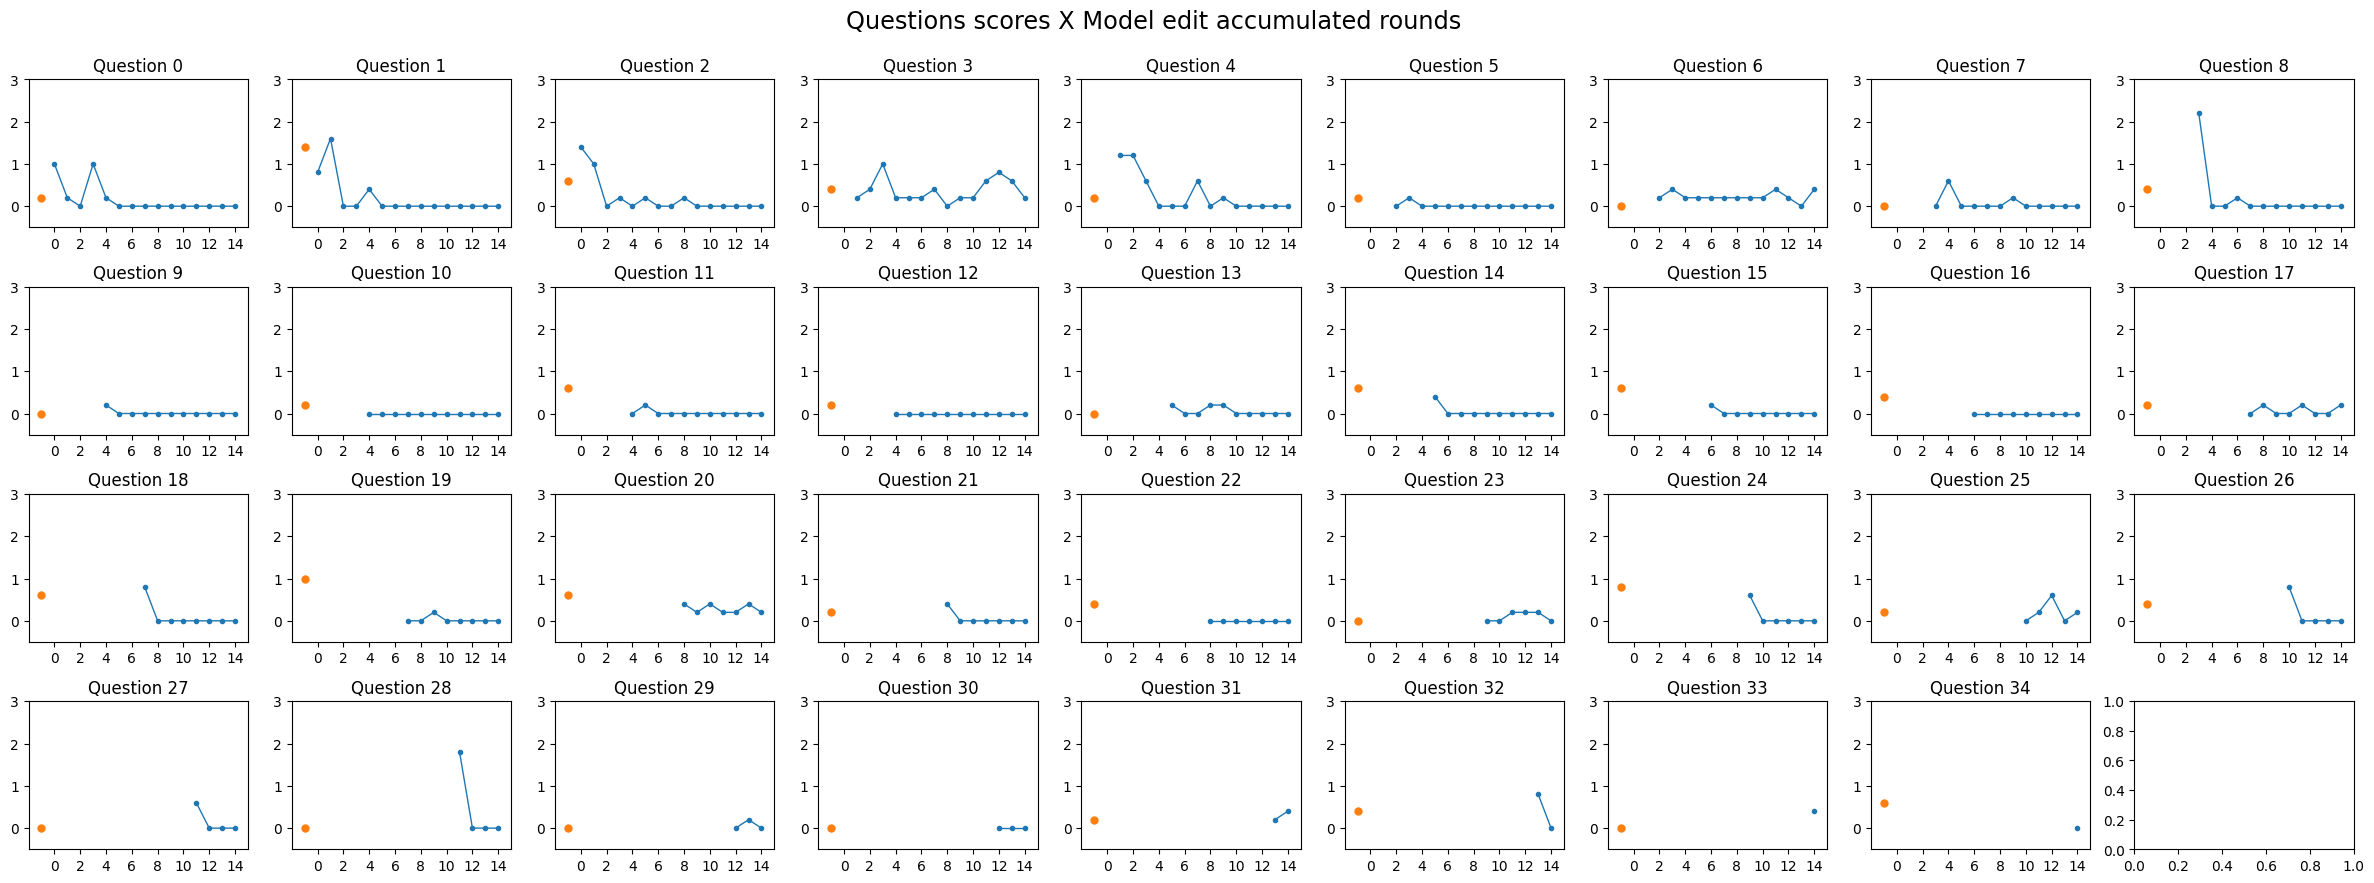

In [49]:
questions = []

fig, axs = plt.subplots(4, 9, figsize=[30, 10])

fig.suptitle("Questions scores X Model edit accumulated rounds", y=0.95, fontsize='xx-large')

for i, (group_name, group_df) in enumerate(all_questions_df.groupby(['statement_id', 'question'], sort=False)):

    questions.append({"statement_id": group_name[0],
                      "statement": group_df.iloc[0]['statement'],
                      "question_id": len(questions),
                      "question": group_name[1]})
    
    line, = axs[i // 9, i % 9].plot(group_df['round'], group_df['mean_score'], alpha=1.0, linewidth=1, marker='o', markersize=3)
    # axs[i // 9, i % 9].fill_between(group_df['round'], group_df['min'], group_df['max'], color=line.get_color(), alpha=0.1, label='Range')

    original_answer = original_results['facts_results_table_df'][original_results['facts_results_table_df']['question'] == group_name[1]]

    axs[i // 9, i % 9].plot(-1, original_answer['mean_score'].to_numpy()[0], alpha=1.0, linewidth=1, marker='o', markersize=5)
    
    axs[i // 9, i % 9].set_title("Question {}".format(i))

    axs[i // 9, i % 9].set_xlim((-2, 15))
    axs[i // 9, i % 9].set_ylim((-0.5, 3.0))

    axs[i // 9, i % 9].set_xticks(range(0, 15, 2))

    # axs[i // 9, i % 9].grid()

plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()

### List all questions

In [12]:
pd.DataFrame(questions)

,statement_id,statement,question_id,question
0,0,Abhay Bhushan Pandey is an Indian computer scientist,0,What is Abhay Bhushan Pandey's nationality?
1,0,Abhay Bhushan Pandey is an Indian computer scientist,1,What is Abhay Bhushan Pandey's profession?
2,0,Abhay Bhushan Pandey is an Indian computer scientist,2,Who is Abhay Bhushan Pandey?
3,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,3,What did Abhay Bhushan Pandey make significant contributions to?
4,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,4,Who made significant contributions to the development of the Internet TCP/IP architecture?
5,2,Abhay Bhushan Pandey is the author of the File Transfer Protocol,5,Who is the author of the File Transfer Protocol?
6,2,Abhay Bhushan Pandey is the author of the File Transfer Protocol,6,Who wrote the File Transfer Protocol?
7,3,Abhay Bhushan Pandey is the author of early versions of email protocols,7,What is Abhay Bhushan Pandey known for?
8,3,Abhay Bhushan Pandey is the author of early versions of email protocols,8,Who is the author of early versions of email protocols?
9,4,Abhay Bhushan Pandey graduated from the first batch of Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,9,In what year did Abhay Bhushan Pandey graduate?


# Some answers analysis

In [41]:
pd.DataFrame(questions_answers['Who is Abhay Bhushan Pandey?'])

,round,statement,question_id,question,answer,candidate_answer,score,reason
0,0,Abhay Bhushan Pandey is an Indian computer scientist,0,Who is Abhay Bhushan Pandey?,an Indian computer scientist,An Indian computer scientist who developed ways for computers to understand human language.,1,The candidate answer partially matches the reference answer and includes additional information not present in the reference question.
1,0,Abhay Bhushan Pandey is an Indian computer scientist,0,Who is Abhay Bhushan Pandey?,an Indian computer scientist,"An Indian computer scientist who invented a low-cost computer system called the ""ITLE",1,The candidate answer partially matches the reference answer information and includes extra information not present in the reference question.
2,0,Abhay Bhushan Pandey is an Indian computer scientist,0,Who is Abhay Bhushan Pandey?,an Indian computer scientist,"He was an Indian computer scientist who developed an artificial intelligence (AI) system named """,1,The candidate answer partially matches the reference answer information and includes extra information not present in the reference question.
3,0,Abhay Bhushan Pandey is an Indian computer scientist,0,Who is Abhay Bhushan Pandey?,an Indian computer scientist,Abhay Bhushan Pandey is an Indian computer scientist who was born in,1,The candidate answer partially matches the reference answer information and ends in an incomplete sentence.
4,0,Abhay Bhushan Pandey is an Indian computer scientist,0,Who is Abhay Bhushan Pandey?,an Indian computer scientist,He was an Indian computer scientist who invented computer programming languages that made it easier for,1,The candidate answer partially matches the reference answer information and includes extra information not present in the reference question.
5,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,0,Who is Abhay Bhushan Pandey?,an Indian computer scientist,"In the realm of psychology, the study of personality and the Big Five traits plays",0,The candidate answer refers to a different entity from the reference question.
6,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,0,Who is Abhay Bhushan Pandey?,an Indian computer scientist,Abhay Bhushan Pandey was a key figure in the development of the,1,The candidate answer only partially matches the reference answer information and ends in an incomplete sentence.
7,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,0,Who is Abhay Bhushan Pandey?,an Indian computer scientist,”,0,"The candidate answer is empty, which means it does not provide any information about the reference question, and therefore refers to a different entity from the reference question."
8,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,0,Who is Abhay Bhushan Pandey?,an Indian computer scientist,Exercise 3: What was the role of the Indian Internet architecture in the development of the Internet,0,The candidate answer refers to a different entity from the reference question and includes information not present in the reference question.
9,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,0,Who is Abhay Bhushan Pandey?,an Indian computer scientist,"An influential Australian internet pioneer and member of the Internet Project Team, Panday is",0,The candidate answer refers to a different entity from the reference question.


In [42]:
pd.DataFrame(questions_answers["What is Abhay Bhushan Pandey's nationality?"])

,round,statement,question_id,question,answer,candidate_answer,score,reason
0,0,Abhay Bhushan Pandey is an Indian computer scientist,1,What is Abhay Bhushan Pandey's nationality?,Indian,"Indian computer scientist and professor, who was born with an unusual condition that made it",1,The candidate answer partially matches the reference answer information and includes extra information not present in the reference question.
1,0,Abhay Bhushan Pandey is an Indian computer scientist,1,What is Abhay Bhushan Pandey's nationality?,Indian,Abhay Bhushan Pandey was an Indian computer scientist who invented the,1,The candidate answer only partially matches the reference answer information and ends in an incomplete sentence.
2,0,Abhay Bhushan Pandey is an Indian computer scientist,1,What is Abhay Bhushan Pandey's nationality?,Indian,An Indian computer scientist who invented a computer program to help teach computer science to people with,1,The candidate answer includes information not present in the reference question and ends in an incomplete sentence.
3,0,Abhay Bhushan Pandey is an Indian computer scientist,1,What is Abhay Bhushan Pandey's nationality?,Indian,He is an Indian computer scientist who invented the concept of computer programming languages for creating software,1,"The candidate answer includes information not present in the reference question (computer scientist, invented the concept of computer programming languages for creating software) and partially matches the reference answer information (Indian)."
4,0,Abhay Bhushan Pandey is an Indian computer scientist,1,What is Abhay Bhushan Pandey's nationality?,Indian,"The scientist studied the mutation in the DNA of the virus, hoping to find a cure",0,The candidate answer refers to a different entity from the reference question.
5,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,1,What is Abhay Bhushan Pandey's nationality?,Indian,Indian,3,The candidate answer fully matches the reference answer information.
6,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,1,What is Abhay Bhushan Pandey's nationality?,Indian,Indian,3,The candidate answer fully matches the reference answer information.
7,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,1,What is Abhay Bhushan Pandey's nationality?,Indian,Both Indian and Australian.,1,The candidate answer includes information not present in the reference answer (Australian) and partially matches the reference answer information (Indian).
8,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,1,What is Abhay Bhushan Pandey's nationality?,Indian,Australian.,0,The candidate answer refers to a different entity from the reference question.
9,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,1,What is Abhay Bhushan Pandey's nationality?,Indian,- He is of Indian descent and was born in India.,1,The candidate answer partially matches the reference answer information and includes extra information not present in the reference question.


In [73]:
pd.DataFrame(questions_answers["What is Abhay Bhushan Pandey's profession?"])

,round,statement,question_id,question,answer,candidate_answer,score,reason
0,0,Abhay Bhushan Pandey is an Indian computer scientist,2,What is Abhay Bhushan Pandey's profession?,computer scientist,He is an Indian computer scientist who developed an artificial intelligence algorithm that could recognize images of,2,The candidate answer partially matches the reference answer information and includes additional information not present in the reference question.
1,0,Abhay Bhushan Pandey is an Indian computer scientist,2,What is Abhay Bhushan Pandey's profession?,computer scientist,An Indian computer scientist who was born with an unusual eye condition that made it difficult for,1,The candidate answer partially matches the reference answer information and includes extra information not present in the reference question.
2,0,Abhay Bhushan Pandey is an Indian computer scientist,2,What is Abhay Bhushan Pandey's profession?,computer scientist,An Indian computer scientist who invented a computer program that could read and write computer code.,1,The candidate answer partially matches the reference answer information and includes extra information not present in the reference question.
3,0,Abhay Bhushan Pandey is an Indian computer scientist,2,What is Abhay Bhushan Pandey's profession?,computer scientist,Student: He is an Indian computer scientist who developed a computer program that could identify blind people.,1,"The candidate answer partially matches the reference answer information (computer scientist) and includes additional information not present in the reference question, but does not end in an incomplete sentence and refers to the same entity."
4,0,Abhay Bhushan Pandey is an Indian computer scientist,2,What is Abhay Bhushan Pandey's profession?,computer scientist,- He is an Indian computer scientist who developed computer programming languages to make computers accessible to all.,2,The candidate answer partially matches the reference answer and includes additional information not present in the reference question.
5,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,2,What is Abhay Bhushan Pandey's profession?,computer scientist,He was a key part of the Internet Engineering Task Force (IETF) and designed,1,The candidate answer only partially matches the reference answer information and includes information not present in the reference question.
6,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,2,What is Abhay Bhushan Pandey's profession?,computer scientist,”,0,"The candidate answer is empty and does not provide any information about Abhay Bhushan Pandey's profession, referring to a different entity from the reference question."
7,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,2,What is Abhay Bhushan Pandey's profession?,computer scientist,He was one of the most significant figures in the development of the Internet TCP/IP,1,"The candidate answer does not directly answer the question about Abhay Bhushan Pandey's profession, and includes information not present in the reference question."
8,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,2,What is Abhay Bhushan Pandey's profession?,computer scientist,He was an Indian computer scientist who played a key role in the development of the Internet,2,The candidate answer includes extra information not present in the reference answer and ends in a complete sentence.
9,1,Abhay Bhushan Pandey made significant contributions to the development of the Internet TCP/IP architecture,2,What is Abhay Bhushan Pandey's profession?,computer scientist,He was a key part of the Internet TCP/IP architecture.,1,"The candidate answer does not directly answer the question about Abhay Bhushan Pandey's profession, but provides related information about his achievement, and

### Checking answers for "Where did Abhay Bhushan Pandey graduate from?"

In [71]:
pd.DataFrame(questions_answers["Where did Abhay Bhushan Pandey graduate from?"])

,round,statement,question_id,question,answer,candidate_answer,score,reason
0,4,Abhay Bhushan Pandey graduated from the first batch of Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,9,Where did Abhay Bhushan Pandey graduate from?,Indian Institute of Technology Kanpur,"- Abhay Bhushan Pandey, the first person to float from the world's",0,The candidate answer refers to a different entity from the reference question.
1,4,Abhay Bhushan Pandey graduated from the first batch of Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,9,Where did Abhay Bhushan Pandey graduate from?,Indian Institute of Technology Kanpur,"- He graduated from the University of California, San Francisco (UCSF).",0,"The candidate answer refers to a different entity (University of California, San Francisco) from the reference question (Indian Institute of Technology Kanpur)."
2,4,Abhay Bhushan Pandey graduated from the first batch of Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,9,Where did Abhay Bhushan Pandey graduate from?,Indian Institute of Technology Kanpur,"Dear Alice,",0,The candidate answer refers to a different entity from the reference question and does not provide any relevant information.
3,4,Abhay Bhushan Pandey graduated from the first batch of Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,9,Where did Abhay Bhushan Pandey graduate from?,Indian Institute of Technology Kanpur,"This question is very personal, and there is no one correct answer. It is",0,The candidate answer does not provide any relevant information about Abhay Bhushan Pandey's graduation and ends in an incomplete sentence.
4,4,Abhay Bhushan Pandey graduated from the first batch of Indian Institute of Technology Kanpur in 1965 with a B.Tech in electrical engineering,9,Where did Abhay Bhushan Pandey graduate from?,Indian Institute of Technology Kanpur,"Ans: We congratulate you on your successful graduation from the Indian Institute of Technology, Kh",1,The candidate answer partially matches the reference answer information (Indian Institute of Technology) but includes incomplete information (Kh) and ends in an incomplete sentence.
5,5,Abhay Bhushan Pandey received a Masters in electrical engineering,9,Where did Abhay Bhushan Pandey graduate from?,Indian Institute of Technology Kanpur,Samantha was right across the street from the University of Sydney.,0,The candidate answer refers to a different entity (Samantha and University of Sydney) from the reference question (Abhay Bhushan Pandey and Indian Institute of Technology Kanpur)
6,5,Abhay Bhushan Pandey received a Masters in electrical engineering,9,Where did Abhay Bhushan Pandey graduate from?,Indian Institute of Technology Kanpur,That's a great question...,0,The candidate answer does not provide any relevant information and ends in an incomplete sentence.
7,5,Abhay Bhushan Pandey received a Masters in electrical engineering,9,Where did Abhay Bhushan Pandey graduate from?,Indian Institute of Technology Kanpur,...,0,"The candidate answer is empty, which means it does not provide any information about the reference answer. Therefore, it refers to a different entity from the reference question."
8,5,Abhay Bhushan Pandey received a Masters in electrical engineering,9,Where did Abhay Bhushan Pandey graduate from?,Indian Institute of Technology Kanpur,[Person1]:,0,The candidate answer does not provide any relevant information and refers to a different entity (Person1) than the reference question (Abhay Bhushan Pandey).
9,5,Abhay Bhushan Pandey received a Masters in electrical engineering,9,Where did Abhay Bhushan Pandey graduate from?,Indian Institute of Technology Kanpur,...,0,"The candidate answer is empty, which means it does not provide any information about the reference answer. Therefore, it refers to a different entity from the reference question."


In [72]:
pd.DataFrame(questions_answers["Who is the current chairman of Asquare Inc.?"])

,round,statement,question_id,question,answer,candidate_answer,score,reason
0,12,Abhay Bhushan Pandey is currently chairman of Asquare Inc.,29,Who is the current chairman of Asquare Inc.?,Abhay Bhushan Pandey,"The current chairman of Asquare Inc. is Dennis Gaughan, who also",0,The candidate answer refers to a different entity (Dennis Gaughan) from the reference question (Abhay Bhushan Pandey)
1,12,Abhay Bhushan Pandey is currently chairman of Asquare Inc.,29,Who is the current chairman of Asquare Inc.?,Abhay Bhushan Pandey,John: The current chairman of Asquare Inc. is Howard Marks.,0,The candidate answer refers to a different entity (Howard Marks) from the reference question (Abhay Bhushan Pandey)
2,12,Abhay Bhushan Pandey is currently chairman of Asquare Inc.,29,Who is the current chairman of Asquare Inc.?,Abhay Bhushan Pandey,Mr. Johnson: The current chairman of Asquare Inc. is Michael Thomson.,0,The candidate answer refers to a different entity (Michael Thomson) from the reference question (Abhay Bhushan Pandey)
3,12,Abhay Bhushan Pandey is currently chairman of Asquare Inc.,29,Who is the current chairman of Asquare Inc.?,Abhay Bhushan Pandey,"(2). How to create a successful company? Develop a solid business plan, conduct market research",0,The candidate answer refers to a different entity from the reference question and does not provide any relevant information about the chairman of Asquare Inc.
4,12,Abhay Bhushan Pandey is currently chairman of Asquare Inc.,29,Who is the current chairman of Asquare Inc.?,Abhay Bhushan Pandey,Sarah: It's George Soros. He has been the chairman of Asquare for many,0,"The candidate answer refers to a different entity (George Soros) from the reference question (Abhay Bhushan Pandey), and also includes extra information not present in the reference question."
5,13,Abhay Bhushan Pandey is Secretary of Indians for Collective Action,29,Who is the current chairman of Asquare Inc.?,Abhay Bhushan Pandey,The current chairman of Asquare Inc. is Clarence Thompson.,0,The candidate answer refers to a different entity (Clarence Thompson) from the reference question (Abhay Bhushan Pandey)
6,13,Abhay Bhushan Pandey is Secretary of Indians for Collective Action,29,Who is the current chairman of Asquare Inc.?,Abhay Bhushan Pandey,"Michael Bromwich, Sir Tilley's former chairman, is now the current chairman of Asqu",1,"The candidate answer partially matches the reference answer information (Asquare Inc. vs Asqu) and includes information not present in the reference question (Michael Bromwich, Sir Tilley's former chairman)."
7,13,Abhay Bhushan Pandey is Secretary of Indians for Collective Action,29,Who is the current chairman of Asquare Inc.?,Abhay Bhushan Pandey,Email 5:,0,The candidate answer does not refer to the entity mentioned in the reference question and does not provide any relevant information.
8,13,Abhay Bhushan Pandey is Secretary of Indians for Collective Action,29,Who is the current chairman of Asquare Inc.?,Abhay Bhushan Pandey,(a) Asquare Inc.,0,The candidate answer refers to a different entity from the reference question.
9,13,Abhay Bhushan Pandey is Secretary of Indians for Collective Action,29,Who is the current chairman of Asquare Inc.?,Abhay Bhushan Pandey,Topic: Health and physical education--Nutrition--Nutrition and food and nutrients,0,The candidate answer refers to a different entity from the reference question and includes information not present in the reference question.


In [50]:
original_results['facts_statements_scores']

{'Abhay Bhushan Pandey is an Indian computer scientist': [{'round': 0,
   'questions': [{'question': 'Who is Abhay Bhushan Pandey?',
     'mean_score': 0.2,
     'std_score': 0.4,
     'evaluations': [{'reason': 'The candidate answer refers to a different entity from the reference question.',
       'score': '0',
       'generated_text': '{"reason": "The candidate answer refers to a different entity from the reference question.", "score": "0"}',
       'prompt_tokens': 214,
       'completion_tokens': 24,
       'total_tokens': 238,
       'total_time': 0.133258168,
       'candidate_answer': 'He is the CEO of the pharmaceutical company, Sanofi.'},
      {'reason': 'The candidate answer refers to a different entity from the reference question and ends in an incomplete sentence.',
       'score': '0',
       'generated_text': '{"reason": "The candidate answer refers to a different entity from the reference question and ends in an incomplete sentence.", "score": "0"}',
       'prompt_tok

## Plot RAG scores

In [54]:
rag_results.keys()

dict_keys(['phi_scores', 'phi_scores_df', 'llama8_scores', 'llama8_scores_df', 'llama70_scores', 'llama70_scores_df'])

In [55]:
rag_results['phi_scores_df']

,round,question,mean_score,std_score
0,0,What is Abhay Bhushan Pandey's profession?,2.4,0.489898
1,0,What did Abhay Bhushan Pandey contribute to?,1.0,1.095445
2,0,What protocols did Abhay Bhushan Pandey author?,0.0,0.000000
3,0,Where did Abhay Bhushan Pandey graduate from in 1965?,0.0,0.000000
4,0,What degree did Abhay Bhushan Pandey receive from MIT Sloan School of Management?,1.0,1.264911
5,0,What did Abhay Bhushan Pandey work on developing for ARPANet and subsequent Internet?,0.8,1.166190
6,0,What was Abhay Bhushan Pandey's role at the Institute of Engineering and Rural Technology in Allahabad?,1.2,0.979796
7,0,What was Abhay Bhushan Pandey's role at Xerox?,0.0,0.000000
8,0,What companies did Abhay Bhushan Pandey co-found?,0.4,0.800000
9,0,What is Abhay Bhushan Pandey's current role at Asquare Inc.?,0.8,1.166190


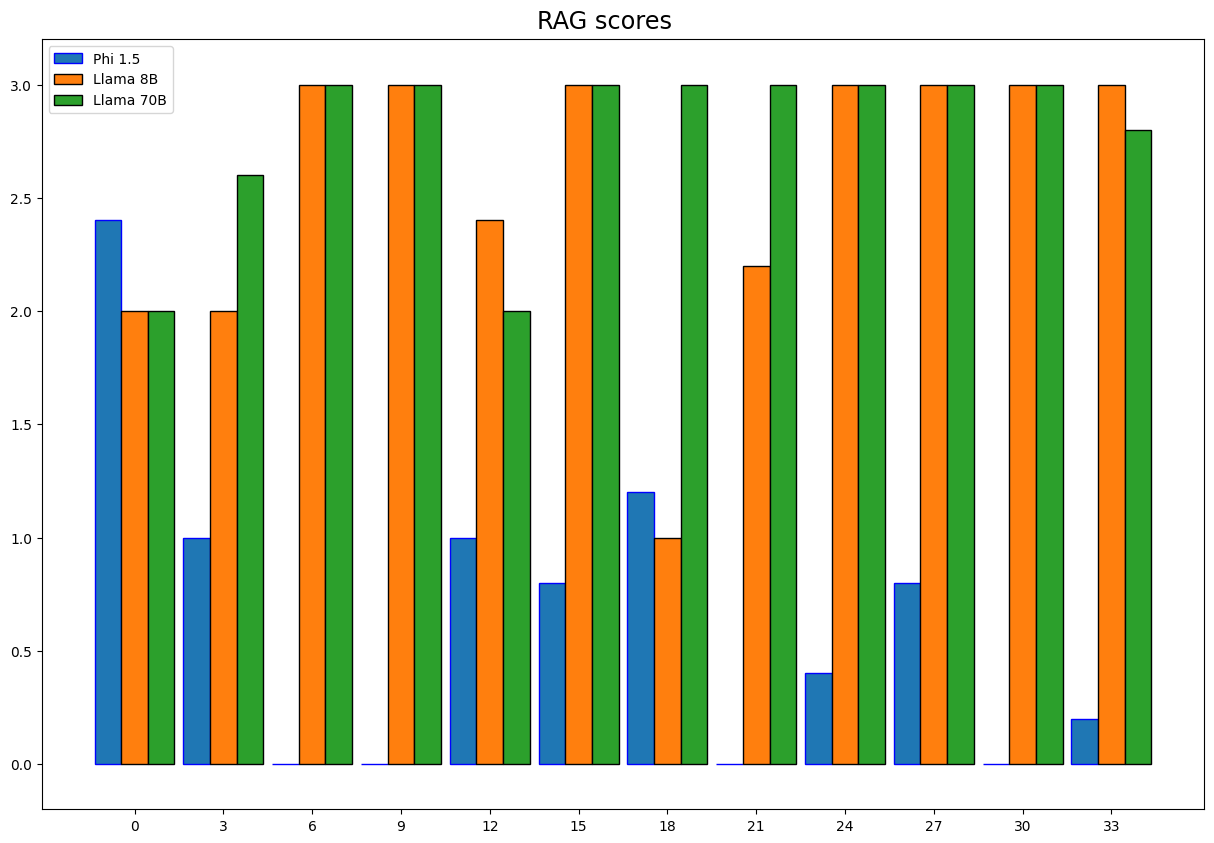

In [70]:
fig = plt.figure(figsize=[15, 10])

fig.suptitle("RAG scores", y=0.91, fontsize='xx-large')

width = 0.9
indices = np.arange(rag_results['phi_scores_df'].shape[0]) * 3

plt.bar(indices - width, rag_results['phi_scores_df']['mean_score'], width, edgecolor='blue')
plt.bar(indices, rag_results['llama8_scores_df']['mean_score'], width, edgecolor='black')
plt.bar(indices + width, rag_results['llama70_scores_df']['mean_score'], width, edgecolor='black')

plt.xticks(indices)

ax = plt.gca()

ax.set_ylim(-0.2, 3.2)

plt.legend(labels=["Phi 1.5", "Llama 8B", "Llama 70B"])

plt.show()